# Tratamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_treino = pd.read_csv('dataset_treino.csv', na_filter=False)
data_teste = pd.read_csv('dataset_teste.csv', na_filter=False)

In [3]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Normal (kWh)             11016 non-null  float64
 2   Horário Económico (kWh)  11016 non-null  float64
 3   Autoconsumo (kWh)        11016 non-null  float64
 4   Injeção na rede (kWh)    11016 non-null  object 
 5   temp                     11016 non-null  float64
 6   feels_like               11016 non-null  float64
 7   temp_min                 11016 non-null  float64
 8   temp_max                 11016 non-null  float64
 9   pressure                 11016 non-null  int64  
 10  humidity                 11016 non-null  int64  
 11  wind_speed               11016 non-null  float64
 12  rain_1h                  11016 non-null  float64
 13  clouds_all               11016 non-null  int64  
 14  weather_description   

In [4]:
data_teste.nunique()

Data                       2256
Normal (kWh)                709
Horário Económico (kWh)     490
Autoconsumo (kWh)           485
temp                       1039
feels_like                 1198
temp_min                    198
temp_max                    208
pressure                     31
humidity                     73
wind_speed                  563
rain_1h                     134
clouds_all                  100
weather_description           8
dtype: int64

In [5]:
data_treino.drop(columns=['Data'], inplace=True)
data_teste.drop(columns=['Data'], inplace=True)

## One-Hot Encoding de **weather_description**

In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(data_treino['weather_description'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

data_treino = pd.concat([data_treino, lb_results_df], axis=1)
data_treino.drop(columns=['weather_description'], inplace=True)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  object 
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  rain_1h                  11016 non-null  float64
 12  clouds_all               11016 non-null  int64  
 13  broken clouds            11016 non-null  int32  
 14  few clouds            

In [7]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(data_teste['weather_description'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

data_teste = pd.concat([data_teste, lb_results_df], axis=1)
data_teste.drop(columns=['weather_description'], inplace=True)
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   feels_like               2256 non-null   float64
 5   temp_min                 2256 non-null   float64
 6   temp_max                 2256 non-null   float64
 7   pressure                 2256 non-null   int64  
 8   humidity                 2256 non-null   int64  
 9   wind_speed               2256 non-null   float64
 10  rain_1h                  2256 non-null   float64
 11  clouds_all               2256 non-null   int64  
 12  broken clouds            2256 non-null   int32  
 13  few clouds               2256 non-null   int32  
 14  heavy intensity rain    

### Conversão de types 64 para types 32

In [8]:
float_features = data_treino.select_dtypes(include='float')
int_features = data_treino.select_dtypes(include='int')

data_treino[float_features.columns] = data_treino[float_features.columns].astype(np.float32)
data_treino[int_features.columns] = data_treino[int_features.columns].astype(np.int32)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float32
 1   Horário Económico (kWh)  11016 non-null  float32
 2   Autoconsumo (kWh)        11016 non-null  float32
 3   Injeção na rede (kWh)    11016 non-null  object 
 4   temp                     11016 non-null  float32
 5   feels_like               11016 non-null  float32
 6   temp_min                 11016 non-null  float32
 7   temp_max                 11016 non-null  float32
 8   pressure                 11016 non-null  int32  
 9   humidity                 11016 non-null  int32  
 10  wind_speed               11016 non-null  float32
 11  rain_1h                  11016 non-null  float32
 12  clouds_all               11016 non-null  int32  
 13  broken clouds            11016 non-null  int32  
 14  few clouds            

In [9]:
float_features = data_teste.select_dtypes(include='float')
int_features = data_teste.select_dtypes(include='int')

data_teste[float_features.columns] = data_teste[float_features.columns].astype(np.float32)
data_teste[int_features.columns] = data_teste[int_features.columns].astype(np.int32)
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float32
 1   Horário Económico (kWh)  2256 non-null   float32
 2   Autoconsumo (kWh)        2256 non-null   float32
 3   temp                     2256 non-null   float32
 4   feels_like               2256 non-null   float32
 5   temp_min                 2256 non-null   float32
 6   temp_max                 2256 non-null   float32
 7   pressure                 2256 non-null   int32  
 8   humidity                 2256 non-null   int32  
 9   wind_speed               2256 non-null   float32
 10  rain_1h                  2256 non-null   float32
 11  clouds_all               2256 non-null   int32  
 12  broken clouds            2256 non-null   int32  
 13  few clouds               2256 non-null   int32  
 14  heavy intensity rain    

### Normalize data

In [10]:
from sklearn.preprocessing import MinMaxScaler
data_treino_normalize = data_treino.copy()
data_teste_normalize = data_teste.copy()

X_scale = data_treino_normalize.drop(columns=['Injeção na rede (kWh)'])

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_scale)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(data_teste_normalize)
X_scale = pd.DataFrame(scaler_X.transform(X_scale[X_scale.columns]), columns=X_scale.columns)
data_teste_normalize = pd.DataFrame(scaler_y.transform(data_teste_normalize[data_teste_normalize.columns]), columns=data_teste_normalize.columns)

data_treino_normalize = pd.concat([X_scale, data_treino_normalize['Injeção na rede (kWh)']], axis=1)

data_treino_normalize.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,clouds_all,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear,Injeção na rede (kWh)
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.825,0.765432,0.172101,...,0.87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.850,0.777778,0.160326,...,0.91,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.825,0.802469,0.172101,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.825,0.814815,0.162138,...,0.95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.825,0.827160,0.160326,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None


### Conversão de types 64 para types 32 no normalize

In [11]:
float_features_normalize = data_treino_normalize.select_dtypes(include='float')

data_treino_normalize[float_features_normalize.columns] = data_treino_normalize[float_features_normalize.columns].astype(np.float32)
data_treino_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float32
 1   Horário Económico (kWh)  11016 non-null  float32
 2   Autoconsumo (kWh)        11016 non-null  float32
 3   temp                     11016 non-null  float32
 4   feels_like               11016 non-null  float32
 5   temp_min                 11016 non-null  float32
 6   temp_max                 11016 non-null  float32
 7   pressure                 11016 non-null  float32
 8   humidity                 11016 non-null  float32
 9   wind_speed               11016 non-null  float32
 10  rain_1h                  11016 non-null  float32
 11  clouds_all               11016 non-null  float32
 12  broken clouds            11016 non-null  float32
 13  few clouds               11016 non-null  float32
 14  heavy intensity rain  

In [12]:
float_features_normalize = data_teste_normalize.select_dtypes(include='float')

data_teste_normalize[float_features_normalize.columns] = data_teste_normalize[float_features_normalize.columns].astype(np.float32)
data_teste_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float32
 1   Horário Económico (kWh)  2256 non-null   float32
 2   Autoconsumo (kWh)        2256 non-null   float32
 3   temp                     2256 non-null   float32
 4   feels_like               2256 non-null   float32
 5   temp_min                 2256 non-null   float32
 6   temp_max                 2256 non-null   float32
 7   pressure                 2256 non-null   float32
 8   humidity                 2256 non-null   float32
 9   wind_speed               2256 non-null   float32
 10  rain_1h                  2256 non-null   float32
 11  clouds_all               2256 non-null   float32
 12  broken clouds            2256 non-null   float32
 13  few clouds               2256 non-null   float32
 14  heavy intensity rain    

In [13]:
data_treino_normalize.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,clouds_all,broken clouds,few clouds,heavy intensity rain,light rain,moderate rain,overcast clouds,scattered clouds,sky is clear,Injeção na rede (kWh)
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.825,0.765432,0.172101,...,0.87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.850,0.777778,0.160326,...,0.91,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.825,0.802469,0.172101,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.825,0.814815,0.162138,...,0.95,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.825,0.827160,0.160326,...,0.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,None


# Modelação

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [15]:
X_treino = data_treino.drop(columns=['Injeção na rede (kWh)'])
y_treino = data_treino['Injeção na rede (kWh)']

X_teste = data_teste


X_treino_normalize = data_treino_normalize.drop(columns=['Injeção na rede (kWh)'])
y_treino_normalize = data_treino_normalize['Injeção na rede (kWh)']

X_teste_normalize = data_teste_normalize

### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.25, random_state=2023, stratify=y_treino)
X_train_normalize, X_test_normalize, y_train_normalize, y_test_normalize = train_test_split(X_treino_normalize, y_treino_normalize, test_size=0.25, random_state=2023, stratify=y_treino_normalize)

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtc = DecisionTreeClassifier(random_state=2023)
dtc.fit(X_treino, y_treino)

predictionDTC = dtc.predict(X_teste)

## Support Vector Classifier

In [53]:
from sklearn.svm import SVC

### Grid Search

In [12]:
# svc = SVC(random_state=2023)

# param_grid = {
#     'C': [0.1, 1], 
#     'gamma': [A0.01, 0.1],
#     'kernel': ['poly', 'linear']
# }

# grid_searchSVC = GridSearchCV(svc, param_grid, cv=3, refit=True, verbose=3)
# grid_searchSVC.fit(X_train, y_train)
# grid_predictionSVC = grid_searchSVC.predict(X_test)

# print("Best estimator: ", grid_searchSVC.best_estimator_)

# print(classification_report(y_test, grid_predictionSVC))
# ConfusionMatrixDisplay.from_predictions(y_test, grid_predictionSVC)
# plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.838 total time=  21.8s
[CV 2/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.819 total time=  23.3s
[CV 3/3] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.827 total time=  28.4s
[CV 1/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.826 total time=   1.1s
[CV 2/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.813 total time=   1.1s
[CV 3/3] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.814 total time=   1.2s
[CV 1/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.826 total time=  33.7s
[CV 2/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.826 total time=  33.4s
[CV 3/3] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.829 total time=  43.2s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.826 total time=   1.2s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.813 total time=   1.1s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;,

In [65]:
svc = SVC(C=0.1, gamma=0.01, kernel='poly', random_state=2023)
svc.fit(X_treino, y_treino)

predictionSVC = svc.predict(X_teste)

## Gradient Boosting Machines

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

### Grid Search para obter os melhores parâmetros

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.853 total time=   5.0s
[CV 2/3] END ..................................., score=0.838 total time=   5.0s
[CV 3/3] END ..................................., score=0.848 total time=   4.9s
Best estimator:  GradientBoostingClassifier(random_state=2023)
              precision    recall  f1-score   support

        High       0.56      0.68      0.61       276
         Low       0.39      0.21      0.28       108
      Medium       0.58      0.54      0.56       274
        None       0.97      0.98      0.98      1944
   Very High       0.63      0.57      0.60       152

    accuracy                           0.86      2754
   macro avg       0.63      0.60      0.61      2754
weighted avg       0.85      0.86      0.85      2754



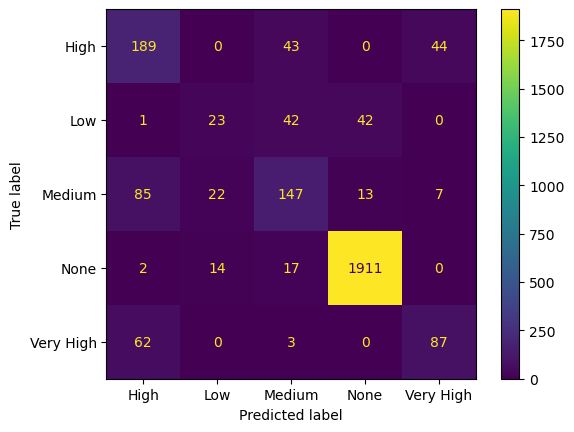

In [22]:
gbm = GradientBoostingClassifier(random_state=2023)

param_grid = {
}


grid_searchGBM = GridSearchCV(gbm, param_grid, cv=3, refit=True, verbose=3)
grid_searchGBM.fit(X_train_normalize, y_train_normalize)
grid_predictionGBM = grid_searchGBM.predict(X_test_normalize)

print("Best estimator: ", grid_searchGBM.best_estimator_)

print(classification_report(y_test_normalize, grid_predictionGBM))
ConfusionMatrixDisplay.from_predictions(y_test_normalize, grid_predictionGBM)
plt.show()

In [23]:
gbm = GradientBoostingClassifier(random_state=2023)
gbm.fit(X_treino_normalize, y_treino_normalize)

predictionGBM = gbm.predict(X_teste_normalize)

## Multilayerd Perceptron

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasRegressor#, KerasClassifier

### Build Model

In [18]:
X_train_normalize.shape[1]

20

In [19]:
def build_model(activation = 'softmax', learning_rate = 0.01, input_dim=20): # To get input_dim: X.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation=activation)) #output

    # Compile the model

    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy']
    )
    return model

In [20]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


### Grid Search

In [21]:
from sklearn.model_selection import KFold

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

kf = KFold(n_splits=3, shuffle=True, random_state=2023)

model = KerasRegressor(model = build_model, batch_size=32, epochs=20)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy', verbose=1, refit=True)

### Label encoding da target feature

In [22]:
replace_map = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}

replace = np.vectorize(replace_map.get)

y_train_normalize_1 = replace(y_train_normalize)
y_test_normalize_1 = replace(y_test_normalize)
y_train_normalize_1 = pd.Series(y_train_normalize_1, name='Injeção na rede (kWh)', index=y_train_normalize.index.tolist())
y_test_normalize_1 = pd.Series(y_test_normalize_1, name='Injeção na rede (kWh)', index=y_test_normalize.index.tolist())

### One-Hot Encoding da target feature (parece não funcionar)

In [23]:
# y_train_normalize = to_categorical(y_train_normalize, 5)
# y_test_normalize = to_categorical(y_test_normalize, 5)
# y_train_normalize

### Cenas

In [24]:
y_train_encoded = y_train_normalize_1.to_numpy().reshape(-1, 1)
y_test_encoded = y_test_normalize_1.to_numpy().reshape(-1, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
y_train_categorical = onehot_encoder.fit_transform(y_train_encoded)
y_test_categorical = onehot_encoder.transform(y_test_encoded)

c:\Users\migue\miniconda3\envs\daa\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
grid_search.fit(X_train_normalize, y_train_categorical, validation_split = 0.2)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


c:\Users\migue\miniconda3\envs\daa\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
c:\Users\migue\miniconda3\envs\daa\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
c:\Users\migue\miniconda3\envs\daa\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_cros

Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20


c:\Users\migue\miniconda3\envs\daa\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
c:\Users\migue\miniconda3\envs\daa\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
c:\Users\migue\miniconda3\envs\daa\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_cros

Epoch 1/20


c:\Users\migue\miniconda3\envs\daa\lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


ValueError: 
All the 9 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\migue\AppData\Local\Temp\__autograph_generated_file_gec9i21.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\migue\miniconda3\envs\daa\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 1) are incompatible



In [31]:
print('Best: %f using %s' % (grid_search.best_score_, grid_search.best_params_))

Best: 0.039216 using {'optimizer': 'SGD'}


In [32]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x000001D74968E170>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [33]:
best_mlp_model.fit(X_train_normalize, y_train_normalize_1, epochs = 100, validation_data = (X_test_normalize, y_test_normalize_1),verbose = 1)

Epoch 1/100
259/259 [==============================] - 1s 976us/step - loss: 1.1708 - accuracy: 0.0392 - val_loss: 1.1714 - val_accuracy: 0.0392
Epoch 2/100
259/259 [==============================] - 0s 724us/step - loss: 1.1708 - accuracy: 0.0392 - val_loss: 1.1714 - val_accuracy: 0.0392
Epoch 3/100
259/259 [==============================] - 0s 713us/step - loss: 1.1708 - accuracy: 0.0392 - val_loss: 1.1714 - val_accuracy: 0.0392
Epoch 4/100
259/259 [==============================] - 0s 716us/step - loss: 1.1708 - accuracy: 0.0392 - val_loss: 1.1714 - val_accuracy: 0.0392
Epoch 5/100
259/259 [==============================] - 0s 719us/step - loss: 1.1708 - accuracy: 0.0392 - val_loss: 1.1714 - val_accuracy: 0.0392
Epoch 6/100
259/259 [==============================] - 0s 715us/step - loss: 1.1708 - accuracy: 0.0392 - val_loss: 1.1714 - val_accuracy: 0.0392
Epoch 7/100
259/259 [==============================] - 0s 732us/step - loss: 1.1708 - accuracy: 0.0392 - val_loss: 1.1714 - val_ac

KerasRegressor(
	model=<function build_model at 0x000001D74968E170>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
)

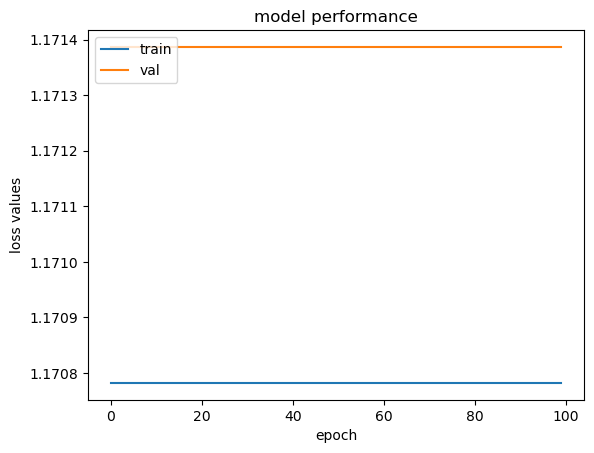

In [34]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss']) 
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
predictionMLP = best_mlp_model.predict(X_test_normalize)

87/87 [==============================] - 0s 419us/step


## MLPClassifier

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=2023)

### Grid Search

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=100000, solver=adam;, score=0.842 total time=   2.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=100000, solver=adam;, score=0.848 total time=   3.2s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=100000, solver=adam;, score=0.841 total time=   3.6s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=100000, solver=adam;, score=0.845 total time=   3.5s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=100000, solver=adam;, score=0.835 total time=   3.5s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50, 25), learning_rate=invscaling, max_iter=100000, solver=adam

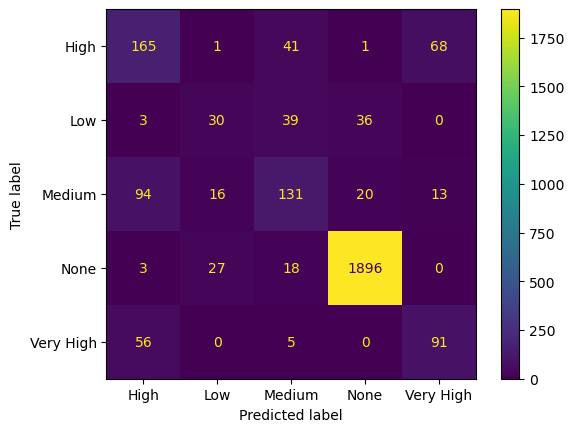

In [18]:
param_grid = {
    'hidden_layer_sizes': [(50, 50, 25), (50, 25, 25)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.001],
    'max_iter': [100000],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}


grid_searchMLP = GridSearchCV(mlp, param_grid, cv=5, refit=True, verbose=3)
grid_searchMLP.fit(X_train_normalize, y_train_normalize)
grid_predictionMLP = grid_searchMLP.predict(X_test_normalize)

print("Best estimator: ", grid_searchMLP.best_estimator_)

mlp_best = grid_searchMLP.best_estimator_

print(classification_report(y_test_normalize, grid_predictionMLP))
ConfusionMatrixDisplay.from_predictions(y_test_normalize, grid_predictionMLP)
plt.show()

### Predict

In [19]:
# MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 50, 25), max_iter=100000, random_state=2023)

mlp_best.fit(X_treino_normalize, y_treino_normalize)
predictionMLP = mlp_best.predict(X_teste_normalize)

### Criação do ficheiro de submissão

In [24]:
with open('results.csv', 'w') as results:
    results.write('RowId,Result\n')
    i = 1
    for p in predictionGBM:
        results.write(f'{i},{p}\n')
        i+=1